x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 214us/step - loss: 0.5901 - acc: 0.8212 - val_loss: 0.1137 - val_acc: 0.9642
Epoch 2/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.2381 - acc: 0.9297 - val_loss: 0.0756 - val_acc: 0.9787
Epoch 3/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.1748 - acc: 0.9483 - val_loss: 0.0642 - val_acc: 0.9826
Epoch 4/12
60000/60000 [==============================] - 12s 199us/step - loss: 0.1539 - acc: 0.9544 - val_loss: 0.0704 - val_acc: 0.9832
Epoch 5/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.1357 - acc: 0.9588 - val_loss: 0.0708 - val_acc: 0.9838
Epoch 6/12
60000/60000 [==============================] - 12s 197us/step - loss: 0.1271 - acc: 0.9623 - val_loss: 0.0528 - val_acc: 0.9854
Epoch 7/12
60000/60000 [===================

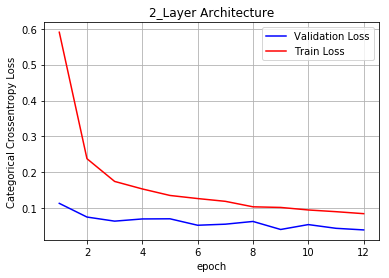

In [3]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()    
    


batch_size = 128
num_classes = 10
nb_epoch = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape)) #here we taking 32 kernels  matrix shape 3*3 
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu')) # here we taking 64 kernals matrix shape 2*2
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # here we max_pooling with 2*2 means we taking highest value in each 2*2 matrix and depends upon its strides value 
model.add(Dropout(0.5))# here we adding dropout layer 
model.add(Flatten()) #we flatten our matrix to 1 dimensional vector 
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5)) # again we applying dropout on flatten vector 
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('2_Layer Architecture')
plt.show()

If we see the above model it gives 98% accuracy intitial we got 98%  accuracy with test loss 0.03 

<h3> With Single CNN Layer with valid (No) padding </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.4016 - acc: 0.8776 - val_loss: 0.0664 - val_acc: 0.9776
Epoch 2/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.1520 - acc: 0.9544 - val_loss: 0.0482 - val_acc: 0.9838
Epoch 3/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.1159 - acc: 0.9647 - val_loss: 0.0485 - val_acc: 0.9843
Epoch 4/12
60000/60000 [==============================] - 5s 77us/step - loss: 0.1011 - acc: 0.9692 - val_loss: 0.0376 - val_acc: 0.9875
Epoch 5/12
60000/60000 [==============================] - 5s 79us/step - loss: 0.0886 - acc: 0.9734 - val_loss: 0.0378 - val_acc: 0.9869
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0822 - acc: 0.9747 - val_loss: 0.0386 - val_acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0773 - acc: 0.9760 - val_loss: 0.0334 - val_acc

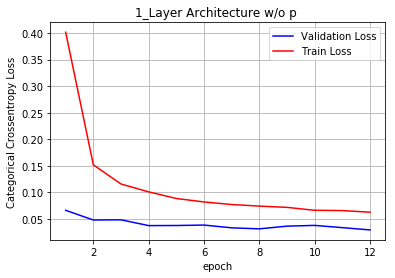

In [4]:
model2 = Sequential()
model2.add(Conv2D(30, kernel_size=(5, 5), padding='valid', activation='relu',input_shape=input_shape))  
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.5)) 
#model2.add(Conv2D(48, (2, 2), activation='relu')) 
#model2.add(MaxPooling2D(pool_size=(2, 2))) 
#model2.add(Dropout(0.25)) 
model2.add(Flatten()) 
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('1_Layer Architecture w/o p ')
plt.show()

We also tried with single CNN layer with no padding it gives accuracy of nearly 99%  with loss 0.02

<h3> With Single CNN Layer with same padding </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.8429 - acc: 0.7309 - val_loss: 0.1582 - val_acc: 0.9526
Epoch 2/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.3049 - acc: 0.9053 - val_loss: 0.0924 - val_acc: 0.9693
Epoch 3/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.2332 - acc: 0.9284 - val_loss: 0.0787 - val_acc: 0.9745
Epoch 4/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.1912 - acc: 0.9409 - val_loss: 0.0667 - val_acc: 0.9780
Epoch 5/12
60000/60000 [==============================] - 4s 66us/step - loss: 0.1722 - acc: 0.9467 - val_loss: 0.0545 - val_acc: 0.9825
Epoch 6/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.1624 - acc: 0.9513 - val_loss: 0.0524 - val_acc: 0.9823
Epoch 7/12
60000/60000 [==============================] - 4s 65us/step - loss: 0.1525 - acc: 0.9537 - val_loss: 0.0498 - val_acc

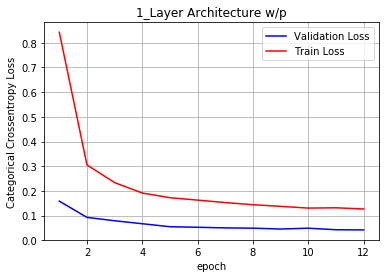

In [5]:
model3 = Sequential()
model3.add(Conv2D(30, kernel_size=(5, 5),strides=(2,2), padding='same', activation='relu',input_shape=input_shape))  
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Dropout(0.5)) 
#model3.add(Conv2D(48, (2, 2), activation='relu')) 
#model3.add(MaxPooling2D(pool_size=(2, 2))) 
#model3.add(Dropout(0.25)) 
model3.add(Flatten()) 
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5)) 
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('1_Layer Architecture w/p')
plt.show()

we also tried with padding in single CNN layer compare to With out padding model it gives 1% less accuracy and in test loss also it gives 0.04 with out padding model gives 0.02

<h3> Single CNN with-out padding with adadelta optimizere </h3

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.4678 - acc: 0.8581 - val_loss: 0.0834 - val_acc: 0.9729
Epoch 2/12
60000/60000 [==============================] - 5s 89us/step - loss: 0.1757 - acc: 0.9473 - val_loss: 0.0517 - val_acc: 0.9830
Epoch 3/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.1317 - acc: 0.9612 - val_loss: 0.0538 - val_acc: 0.9824
Epoch 4/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.1103 - acc: 0.9673 - val_loss: 0.0416 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0972 - acc: 0.9718 - val_loss: 0.0384 - val_acc: 0.9880
Epoch 6/12
60000/60000 [==============================] - 5s 88us/step - loss: 0.0917 - acc: 0.9731 - val_loss: 0.0388 - val_acc: 0.9880
Epoch 7/12
60000/60000 [==============================] - 5s 87us/step - loss: 0.0857 - acc: 0.9751 - val_loss: 0.0383 - val_ac

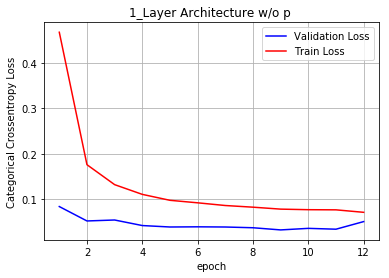

In [6]:
model2 = Sequential()
model2.add(Conv2D(30, kernel_size=(5, 5), padding='valid', activation='relu',input_shape=input_shape))  
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(3, 3)))
model2.add(Dropout(0.5)) 
#model2.add(Conv2D(48, (2, 2), activation='relu')) 
#model2.add(MaxPooling2D(pool_size=(2, 2))) 
#model2.add(Dropout(0.25)) 
model2.add(Flatten()) 
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5)) 
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history2 = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history2.history['val_loss']
ty = history2.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('1_Layer Architecture w/o p ')
plt.show()

Here we try with adadelta optimizer with out padding it gives 0.05 test loss and accuracy 0.98

<h3>Single CNN with padding with Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.8368 - acc: 0.7378 - val_loss: 0.1387 - val_acc: 0.9599
Epoch 2/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.3154 - acc: 0.9025 - val_loss: 0.0958 - val_acc: 0.9690
Epoch 3/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.2373 - acc: 0.9281 - val_loss: 0.0774 - val_acc: 0.9754
Epoch 4/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.1999 - acc: 0.9403 - val_loss: 0.0662 - val_acc: 0.9792
Epoch 5/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.1797 - acc: 0.9453 - val_loss: 0.0639 - val_acc: 0.9795
Epoch 6/12
60000/60000 [==============================] - 4s 67us/step - loss: 0.1692 - acc: 0.9489 - val_loss: 0.0589 - val_acc: 0.9814
Epoch 7/12
60000/60000 [==============================] - 4s 68us/step - loss: 0.1565 - acc: 0.9522 - val_loss: 0.0537 - val_acc

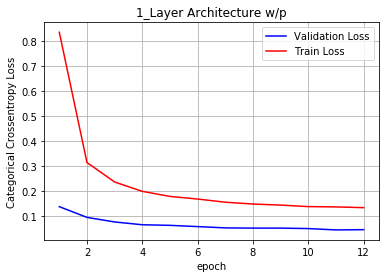

In [7]:
model3 = Sequential()
model3.add(Conv2D(30, kernel_size=(5, 5),strides=(2,2), padding='same', activation='relu',input_shape=input_shape))  
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(3, 3)))
model3.add(Dropout(0.5)) 
#model3.add(Conv2D(48, (2, 2), activation='relu')) 
#model3.add(MaxPooling2D(pool_size=(2, 2))) 
#model3.add(Dropout(0.25)) 
model3.add(Flatten()) 
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5)) 
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history3 = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history3.history['val_loss']
ty = history3.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('1_Layer Architecture w/p')
plt.show()

Here we see with padding using adadelta optimizer we got 0.04 test loss and 0.98 accuracy 

<h3>3 Layer CNN with out padding  </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.3388 - acc: 0.8956 - val_loss: 0.0626 - val_acc: 0.9797
Epoch 2/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1126 - acc: 0.9653 - val_loss: 0.0476 - val_acc: 0.9845
Epoch 3/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0881 - acc: 0.9726 - val_loss: 0.0596 - val_acc: 0.9816
Epoch 4/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.0769 - acc: 0.9765 - val_loss: 0.0379 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0697 - acc: 0.9787 - val_loss: 0.0417 - val_acc: 0.9862
Epoch 6/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0621 - acc: 0.9809 - val_loss: 0.0318 - val_acc: 0.9894
Epoch 7/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.0582 - acc: 0.9818 - val_loss: 0.0316 - 

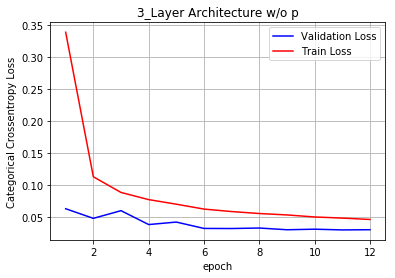

In [8]:
model4 = Sequential()
model4.add(Conv2D(20, kernel_size=(2, 2),activation='relu',input_shape=input_shape))  
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(3, 3))) 
model4.add(Dropout(0.2)) 
#layer-2
model4.add(Conv2D(40, (4, 4), activation='relu')) 
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2))) 
model4.add(Dropout(0.2)) 
#layer-3
model4.add(Conv2D(60, (3, 3), activation='relu')) 
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(1, 1))) 
model4.add(Dropout(0.2)) 
#flatten to 1-d
model4.add(Flatten()) 
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.2)) 
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture w/o p')
plt.show()

Here we try with 3 layer CNN with out padding we got 99% accuracy with test loss 0.02 which is good we also compare with with padding model below 

<h3> 3 Layer CNN with same padding at every layer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 149us/step - loss: 1.5788 - acc: 0.4623 - val_loss: 0.4845 - val_acc: 0.8743
Epoch 2/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.6457 - acc: 0.7908 - val_loss: 0.1986 - val_acc: 0.9448
Epoch 3/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.4655 - acc: 0.8583 - val_loss: 0.1285 - val_acc: 0.9604
Epoch 4/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.3843 - acc: 0.8846 - val_loss: 0.0940 - val_acc: 0.9697
Epoch 5/12
60000/60000 [==============================] - 7s 113us/step - loss: 0.3515 - acc: 0.8952 - val_loss: 0.0926 - val_acc: 0.9713
Epoch 6/12
60000/60000 [==============================] - 7s 115us/step - loss: 0.3218 - acc: 0.9046 - val_loss: 0.0871 - val_acc: 0.9740
Epoch 7/12
60000/60000 [==============================] - 7s 117us/step - loss: 0.3148 - acc: 0.9073 - val_loss: 0.0824 - 

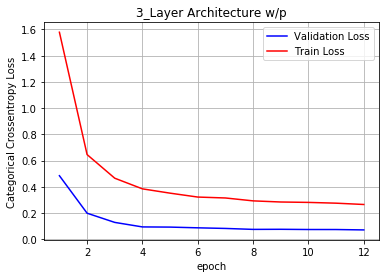

In [9]:
model5 = Sequential()
model5.add(Conv2D(20, kernel_size=(2, 2),strides=(1,1), padding='same',activation='relu',input_shape=input_shape))  
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(3, 3))) 
model5.add(Dropout(0.5)) 
#layer-2
model5.add(Conv2D(40, (4, 4),strides=(2,2), padding='same', activation='relu')) 
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2))) 
model5.add(Dropout(0.5)) 
#layer-3
model5.add(Conv2D(60, (3, 3),strides=(2,2), padding='same', activation='relu')) 
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(1, 1))) 
model5.add(Dropout(0.5)) 
#flatten to 1-d
model5.add(Flatten()) 
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5)) 
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history5 = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture w/p')
plt.show()

We add same padding at every layer compare to valid padding model  in previous model we get here  97% accuracy and 0.07 test loss compare to padding model valid padding gives better results than padding model 

<h3> 3 CNN with padding with Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 156us/step - loss: 1.4570 - acc: 0.5033 - val_loss: 0.4102 - val_acc: 0.8810
Epoch 2/12
60000/60000 [==============================] - 7s 124us/step - loss: 0.6177 - acc: 0.8032 - val_loss: 0.1679 - val_acc: 0.9518
Epoch 3/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.4541 - acc: 0.8651 - val_loss: 0.1176 - val_acc: 0.9663
Epoch 4/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.3829 - acc: 0.8861 - val_loss: 0.0974 - val_acc: 0.9700
Epoch 5/12
60000/60000 [==============================] - 7s 122us/step - loss: 0.3543 - acc: 0.8960 - val_loss: 0.0927 - val_acc: 0.9708
Epoch 6/12
60000/60000 [==============================] - 7s 120us/step - loss: 0.3276 - acc: 0.9032 - val_loss: 0.0897 - val_acc: 0.9726
Epoch 7/12
60000/60000 [==============================] - 7s 121us/step - loss: 0.3110 - acc: 0.9100 - val_loss: 0.0831 - 

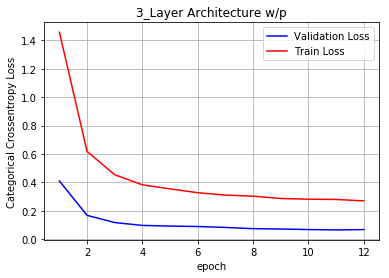

In [10]:
model5 = Sequential()
model5.add(Conv2D(20, kernel_size=(2, 2),strides=(1,1), padding='same',activation='relu',input_shape=input_shape))  
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(3, 3))) 
model5.add(Dropout(0.5)) 
#layer-2
model5.add(Conv2D(40, (4, 4),strides=(2,2), padding='same', activation='relu')) 
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2))) 
model5.add(Dropout(0.5)) 
#layer-3
model5.add(Conv2D(60, (3, 3),strides=(2,2), padding='same', activation='relu')) 
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(1, 1))) 
model5.add(Dropout(0.5)) 
#flatten to 1-d
model5.add(Flatten()) 
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5)) 
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history5 = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score5 = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score5[0])
print('Test accuracy:', score5[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history5.history['val_loss']
ty = history5.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture w/p')
plt.show()

Here we see with adadelta optimizer with padding we got test loss 0.06 with accuracy 0.97

<h3> 3 CNN with out padding with Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.3054 - acc: 0.9062 - val_loss: 0.0580 - val_acc: 0.9805
Epoch 2/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.1101 - acc: 0.9670 - val_loss: 0.0554 - val_acc: 0.9816
Epoch 3/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0858 - acc: 0.9739 - val_loss: 0.0384 - val_acc: 0.9865
Epoch 4/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0710 - acc: 0.9785 - val_loss: 0.0384 - val_acc: 0.9881
Epoch 5/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0644 - acc: 0.9806 - val_loss: 0.0317 - val_acc: 0.9902
Epoch 6/12
60000/60000 [==============================] - 8s 132us/step - loss: 0.0604 - acc: 0.9818 - val_loss: 0.0324 - val_acc: 0.9899
Epoch 7/12
60000/60000 [==============================] - 8s 133us/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0376 -

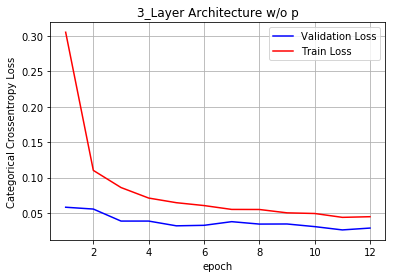

In [11]:
model4 = Sequential()
model4.add(Conv2D(20, kernel_size=(2, 2),activation='relu',input_shape=input_shape))  
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(3, 3))) 
model4.add(Dropout(0.2)) 
#layer-2
model4.add(Conv2D(40, (4, 4), activation='relu')) 
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2))) 
model4.add(Dropout(0.2)) 
#layer-3
model4.add(Conv2D(60, (3, 3), activation='relu')) 
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(1, 1))) 
model4.add(Dropout(0.2)) 
#flatten to 1-d
model4.add(Flatten()) 
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.2)) 
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history4 = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score4 = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history4.history['val_loss']
ty = history4.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('3_Layer Architecture w/o p')
plt.show()

Here we see with out  padding model using adadelta optimizer we got test loss 0.02 and accuracy 0.99 

<h3> 5 Layer Simple CNN architecture with out padding </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 347us/step - loss: 1.2994 - acc: 0.5843 - val_loss: 0.3280 - val_acc: 0.8882
Epoch 2/12
60000/60000 [==============================] - 18s 292us/step - loss: 0.3082 - acc: 0.9073 - val_loss: 0.0820 - val_acc: 0.9737
Epoch 3/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.1903 - acc: 0.9443 - val_loss: 0.0526 - val_acc: 0.9844
Epoch 4/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.1441 - acc: 0.9586 - val_loss: 0.0504 - val_acc: 0.9841
Epoch 5/12
60000/60000 [==============================] - 18s 292us/step - loss: 0.1243 - acc: 0.9650 - val_loss: 0.0394 - val_acc: 0.9894
Epoch 6/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.1097 - acc: 0.9688 - val_loss: 0.0360 - val_acc: 0.9882
Epoch 7/12
60000/60000 [==============================] - 17s 291us/step - loss: 0.0974 - acc: 0.9729 - val_loss: 0.

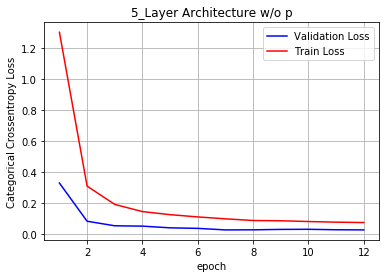

In [12]:
model6 = Sequential()
model6.add(Conv2D(20, kernel_size=(2, 2),activation='relu',input_shape=input_shape))  
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(3, 3))) 
model6.add(Dropout(0.5)) 
#layer-2
model6.add(Conv2D(40, (7, 7), activation='relu')) 
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(2, 2))) 
model6.add(Dropout(0.5)) 
#layer-3
model6.add(Conv2D(60, (5, 5), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(3, 3))) 
model6.add(Dropout(0.5)) 
#layer-4
model6.add(Conv2D(80, (3, 3), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(1, 1))) 
model6.add(Dropout(0.5)) 
#layer-5
model6.add(Conv2D(100, (2, 2), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2))) 
model6.add(Dropout(0.5)) 
#flatten to 1-d
model6.add(Flatten()) 
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5)) 
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history6 = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score6 = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history6.history['val_loss']
ty = history6.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture w/o p')
plt.show()

We also try with 5 layer CNN with out padding and padding here we see without padding results we got 99% accuracy with test loss 0.02 like an 3 CNN model valid model we got slightly simmilar results here 

<h3> 5 Layer CNN with same padding at every layer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13s 219us/step - loss: 2.0294 - acc: 0.3055 - val_loss: 0.8246 - val_acc: 0.7053
Epoch 2/12
60000/60000 [==============================] - 10s 161us/step - loss: 0.8533 - acc: 0.7004 - val_loss: 0.2444 - val_acc: 0.9413
Epoch 3/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.4590 - acc: 0.8638 - val_loss: 0.1286 - val_acc: 0.9635
Epoch 4/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.3137 - acc: 0.9156 - val_loss: 0.0889 - val_acc: 0.9764
Epoch 5/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.2585 - acc: 0.9320 - val_loss: 0.0817 - val_acc: 0.9777
Epoch 6/12
60000/60000 [==============================] - 10s 159us/step - loss: 0.2289 - acc: 0.9408 - val_loss: 0.0739 - val_acc: 0.9786
Epoch 7/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.2061 - acc: 0.9477 - val_loss: 0.

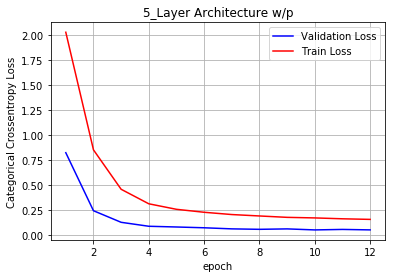

In [13]:
model7 = Sequential()
model7.add(Conv2D(20, kernel_size=(9, 9),strides=(2,2), padding='same',activation='relu',input_shape=input_shape))  
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(3, 3))) 
model7.add(Dropout(0.5)) 
#layer-2
model7.add(Conv2D(40, (7, 7), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(2, 2))) 
model7.add(Dropout(0.5)) 
#layer-3
model7.add(Conv2D(60, (5, 5), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(3, 3))) 
model7.add(Dropout(0.5)) 
#layer-4
model7.add(Conv2D(80, (3, 3), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(1, 1))) 
model7.add(Dropout(0.5)) 
#layer-5
model7.add(Conv2D(100, (2, 2), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(1, 1))) 
model7.add(Dropout(0.5)) 
#flatten to 1-d
model7.add(Flatten()) 
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5)) 
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history7 = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score7 = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history7.history['val_loss']
ty = history7.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture w/p')
plt.show()

Here above we see 5 layer CNN with padding we got 98% accuracy with test loss 0.05 which is slightly similar to 5 layer CNN valid model so using 5 layer CNN we got nearly similar results by using padding and without padding and valid padding gives better results then padding model 

<h3> 5 CNN layer with padding using Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 14s 231us/step - loss: 1.8318 - acc: 0.3739 - val_loss: 0.4745 - val_acc: 0.8685
Epoch 2/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.6553 - acc: 0.7842 - val_loss: 0.2283 - val_acc: 0.9397
Epoch 3/12
60000/60000 [==============================] - 10s 171us/step - loss: 0.4211 - acc: 0.8768 - val_loss: 0.1419 - val_acc: 0.9603
Epoch 4/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.3063 - acc: 0.9173 - val_loss: 0.1024 - val_acc: 0.9733
Epoch 5/12
60000/60000 [==============================] - 10s 172us/step - loss: 0.2534 - acc: 0.9356 - val_loss: 0.0871 - val_acc: 0.9771
Epoch 6/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.2226 - acc: 0.9434 - val_loss: 0.0752 - val_acc: 0.9800
Epoch 7/12
60000/60000 [==============================] - 10s 168us/step - loss: 0.1976 - acc: 0.9489 - val_loss: 0.

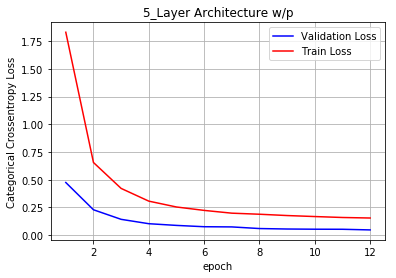

In [14]:
model7 = Sequential()
model7.add(Conv2D(20, kernel_size=(9, 9),strides=(2,2), padding='same',activation='relu',input_shape=input_shape))  
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(3, 3))) 
model7.add(Dropout(0.5)) 
#layer-2
model7.add(Conv2D(40, (7, 7), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(2, 2))) 
model7.add(Dropout(0.5)) 
#layer-3
model7.add(Conv2D(60, (5, 5), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(3, 3))) 
model7.add(Dropout(0.5)) 
#layer-4
model7.add(Conv2D(80, (3, 3), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(1, 1))) 
model7.add(Dropout(0.5)) 
#layer-5
model7.add(Conv2D(100, (2, 2), activation='relu',strides=(2,2), padding='same')) 
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(1, 1))) 
model7.add(Dropout(0.5)) 
#flatten to 1-d
model7.add(Flatten()) 
model7.add(Dense(128, activation='relu'))
model7.add(Dropout(0.5)) 
model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history7 = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score7 = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score7[0])
print('Test accuracy:', score7[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history7.history['val_loss']
ty = history7.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture w/p')
plt.show()

Here we see with padding using adadelta optimizer we got test loss 0.04 with accuracy 0.98

<h3> 5 CNN layer with out padding with Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 363us/step - loss: 1.0834 - acc: 0.6574 - val_loss: 0.1227 - val_acc: 0.9640
Epoch 2/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.2228 - acc: 0.9347 - val_loss: 0.0806 - val_acc: 0.9742
Epoch 3/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.1419 - acc: 0.9602 - val_loss: 0.0380 - val_acc: 0.9896
Epoch 4/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.1193 - acc: 0.9672 - val_loss: 0.0325 - val_acc: 0.9898
Epoch 5/12
60000/60000 [==============================] - 18s 300us/step - loss: 0.0988 - acc: 0.9731 - val_loss: 0.0366 - val_acc: 0.9898
Epoch 6/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0910 - acc: 0.9747 - val_loss: 0.0324 - val_acc: 0.9909
Epoch 7/12
60000/60000 [==============================] - 18s 301us/step - loss: 0.0834 - acc: 0.9765 - val_loss: 0.

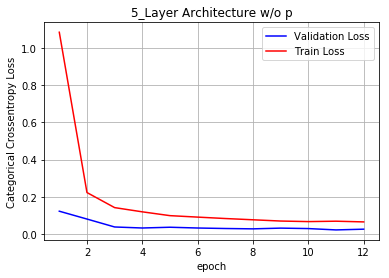

In [15]:
model6 = Sequential()
model6.add(Conv2D(20, kernel_size=(2, 2),activation='relu',input_shape=input_shape))  
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(3, 3))) 
model6.add(Dropout(0.5)) 
#layer-2
model6.add(Conv2D(40, (7, 7), activation='relu')) 
model6.add(BatchNormalization())
#model6.add(MaxPooling2D(pool_size=(2, 2))) 
model6.add(Dropout(0.5)) 
#layer-3
model6.add(Conv2D(60, (5, 5), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(3, 3))) 
model6.add(Dropout(0.5)) 
#layer-4
model6.add(Conv2D(80, (3, 3), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(1, 1))) 
model6.add(Dropout(0.5)) 
#layer-5
model6.add(Conv2D(100, (2, 2), activation='relu')) 
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2))) 
model6.add(Dropout(0.5)) 
#flatten to 1-d
model6.add(Flatten()) 
model6.add(Dense(128, activation='relu'))
model6.add(Dropout(0.5)) 
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history6 = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score6 = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score6[0])
print('Test accuracy:', score6[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history6.history['val_loss']
ty = history6.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('5_Layer Architecture w/o p')
plt.show()

Here we see with out paddng model using adadelta optimizer we got test loss 0.02 with accuracy 0.99

<h3>7 layer Simple CNN architecture same padding at every layer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 249us/step - loss: 2.4588 - acc: 0.1338 - val_loss: 2.5094 - val_acc: 0.1219
Epoch 2/12
60000/60000 [==============================] - 10s 169us/step - loss: 1.9397 - acc: 0.2385 - val_loss: 1.7395 - val_acc: 0.3297
Epoch 3/12
60000/60000 [==============================] - 10s 167us/step - loss: 1.6019 - acc: 0.3563 - val_loss: 1.2280 - val_acc: 0.4941
Epoch 4/12
60000/60000 [==============================] - 10s 168us/step - loss: 1.3652 - acc: 0.4609 - val_loss: 0.9166 - val_acc: 0.6908
Epoch 5/12
60000/60000 [==============================] - 10s 168us/step - loss: 1.1344 - acc: 0.5787 - val_loss: 0.5570 - val_acc: 0.8010
Epoch 6/12
60000/60000 [==============================] - 10s 169us/step - loss: 0.9356 - acc: 0.6752 - val_loss: 0.4121 - val_acc: 0.8573
Epoch 7/12
60000/60000 [==============================] - 10s 167us/step - loss: 0.8078 - acc: 0.7247 - val_loss: 0.

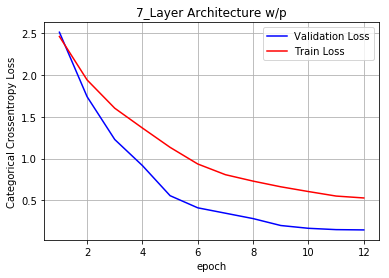

In [16]:
model8 = Sequential()
model8.add(Conv2D(12, kernel_size=(4, 4),strides=(2,2), padding='same',activation='relu',input_shape=input_shape))  
#model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(3, 3))) 
model8.add(Dropout(0.5)) 
#layer-2
model8.add(Conv2D(24, (3, 3), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-3
model8.add(Conv2D(34, (5, 5), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-4
model8.add(Conv2D(44, (3, 3), activation='relu', padding='same',strides=(2,2))) 
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(1, 1))) 
model8.add(Dropout(0.5)) 
#layer-5
model8.add(Conv2D(54, (4, 4), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-6
model8.add(Conv2D(64, (2, 2), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-7
model8.add(Conv2D(74, (2, 2), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(1, 1))) 
model8.add(Dropout(0.5)) 
#flatten to 1-d
model8.add(Flatten()) 
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.5)) 
model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history8 = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score8 = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history8.history['val_loss']
ty = history8.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('7_Layer Architecture w/p')
plt.show()

Here we see 7 layer CNN model with padding model we got 96% accuracy with test loss 0.14 compare to 3CNN and 5CNN this 7CNN model gives less results 

<h3>7 Layer CNN with out Padding  </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 20s 342us/step - loss: 1.6117 - acc: 0.4638 - val_loss: 0.8743 - val_acc: 0.7388
Epoch 2/12
60000/60000 [==============================] - 15s 250us/step - loss: 0.4349 - acc: 0.8718 - val_loss: 0.2556 - val_acc: 0.9275
Epoch 3/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.2569 - acc: 0.9278 - val_loss: 0.1900 - val_acc: 0.9472
Epoch 4/12
60000/60000 [==============================] - 15s 248us/step - loss: 0.1952 - acc: 0.9464 - val_loss: 0.1016 - val_acc: 0.9718
Epoch 5/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.1623 - acc: 0.9570 - val_loss: 0.0973 - val_acc: 0.9724
Epoch 6/12
60000/60000 [==============================] - 15s 249us/step - loss: 0.1437 - acc: 0.9620 - val_loss: 0.0769 - val_acc: 0.9793
Epoch 7/12
60000/60000 [==============================] - 15s 251us/step - loss: 0.1280 - acc: 0.9662 - val_loss: 0.

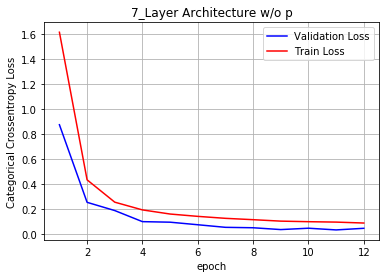

In [17]:
model9 = Sequential()
model9.add(Conv2D(12, kernel_size=(4, 4),activation='relu',input_shape=input_shape))  
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(3, 3))) 
model9.add(Dropout(0.5)) 
#layer-2
model9.add(Conv2D(24, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-3
model9.add(Conv2D(34, (5, 5), activation='relu')) 
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-4
model9.add(Conv2D(44, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(1, 1))) 
model9.add(Dropout(0.5)) 
#layer-5
model9.add(Conv2D(54, (4, 4), activation='relu' )) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-6
model9.add(Conv2D(64, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-7
model9.add(Conv2D(74, (2, 2), activation='relu')) 
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(1, 1))) 
model9.add(Dropout(0.5)) 
#flatten to 1-d
model9.add(Flatten()) 
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.5)) 
model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history9 = model9.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score9 = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history9.history['val_loss']
ty = history9.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('7_Layer Architecture w/o p')
plt.show()

Here we see above CNN with 7 layer compare to 7 layer CNN with padding this valid model gives better results it gives 98% accuracy with test loss 0.04 

<h3> CNN 7 layer with padding using Adadelt optimizer</h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 273us/step - loss: 2.4212 - acc: 0.1410 - val_loss: 2.1676 - val_acc: 0.2135
Epoch 2/12
60000/60000 [==============================] - 11s 182us/step - loss: 1.8249 - acc: 0.2833 - val_loss: 1.2498 - val_acc: 0.5414
Epoch 3/12
60000/60000 [==============================] - 11s 182us/step - loss: 1.3443 - acc: 0.4648 - val_loss: 0.8643 - val_acc: 0.5883
Epoch 4/12
60000/60000 [==============================] - 11s 181us/step - loss: 1.1016 - acc: 0.5701 - val_loss: 0.5978 - val_acc: 0.7803
Epoch 5/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.9140 - acc: 0.6781 - val_loss: 0.4562 - val_acc: 0.8725
Epoch 6/12
60000/60000 [==============================] - 11s 180us/step - loss: 0.7894 - acc: 0.7335 - val_loss: 0.3559 - val_acc: 0.8902
Epoch 7/12
60000/60000 [==============================] - 11s 182us/step - loss: 0.7210 - acc: 0.7664 - val_loss: 0.

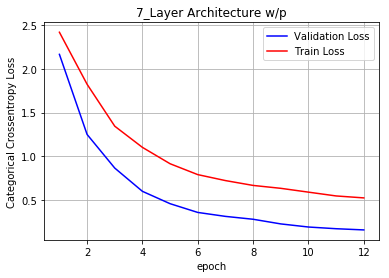

In [18]:
model8 = Sequential()
model8.add(Conv2D(12, kernel_size=(4, 4),strides=(2,2), padding='same',activation='relu',input_shape=input_shape))  
#model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(3, 3))) 
model8.add(Dropout(0.5)) 
#layer-2
model8.add(Conv2D(24, (3, 3), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-3
model8.add(Conv2D(34, (5, 5), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-4
model8.add(Conv2D(44, (3, 3), activation='relu', padding='same',strides=(2,2))) 
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(1, 1))) 
model8.add(Dropout(0.5)) 
#layer-5
model8.add(Conv2D(54, (4, 4), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-6
model8.add(Conv2D(64, (2, 2), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2))) 
model8.add(Dropout(0.5)) 
#layer-7
model8.add(Conv2D(74, (2, 2), activation='relu', padding='same',strides=(2,2)))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(1, 1))) 
model8.add(Dropout(0.5)) 
#flatten to 1-d
model8.add(Flatten()) 
model8.add(Dense(128, activation='relu'))
model8.add(Dropout(0.5)) 
model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history8 = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score8 = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score8[0])
print('Test accuracy:', score8[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history8.history['val_loss']
ty = history8.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('7_Layer Architecture w/p')
plt.show()

Here we see with adadelta opimizer with padding model we got test loss 0.15 with accuracy 0.96

<h3> CNN 7 Layer with out padding using Adadelta optimizer </h3>

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 22s 363us/step - loss: 1.3290 - acc: 0.5624 - val_loss: 0.3395 - val_acc: 0.9029
Epoch 2/12
60000/60000 [==============================] - 16s 262us/step - loss: 0.2881 - acc: 0.9168 - val_loss: 0.0947 - val_acc: 0.9742
Epoch 3/12
60000/60000 [==============================] - 16s 263us/step - loss: 0.1836 - acc: 0.9499 - val_loss: 0.0937 - val_acc: 0.9744
Epoch 4/12
60000/60000 [==============================] - 16s 263us/step - loss: 0.1483 - acc: 0.9604 - val_loss: 0.0682 - val_acc: 0.9815
Epoch 5/12
60000/60000 [==============================] - 16s 262us/step - loss: 0.1289 - acc: 0.9664 - val_loss: 0.0743 - val_acc: 0.9809
Epoch 6/12
60000/60000 [==============================] - 16s 261us/step - loss: 0.1171 - acc: 0.9693 - val_loss: 0.0619 - val_acc: 0.9850
Epoch 7/12
60000/60000 [==============================] - 16s 263us/step - loss: 0.1083 - acc: 0.9717 - val_loss: 0.

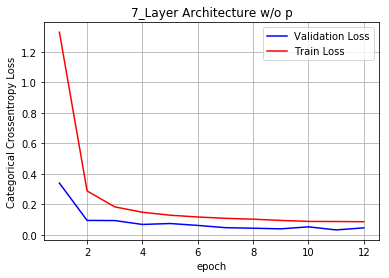

In [19]:
model9 = Sequential()
model9.add(Conv2D(12, kernel_size=(4, 4),activation='relu',input_shape=input_shape))  
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(3, 3))) 
model9.add(Dropout(0.5)) 
#layer-2
model9.add(Conv2D(24, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-3
model9.add(Conv2D(34, (5, 5), activation='relu')) 
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-4
model9.add(Conv2D(44, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(1, 1))) 
model9.add(Dropout(0.5)) 
#layer-5
model9.add(Conv2D(54, (4, 4), activation='relu' )) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-6
model9.add(Conv2D(64, (3, 3), activation='relu')) 
model9.add(BatchNormalization())
#model9.add(MaxPooling2D(pool_size=(2, 2))) 
model9.add(Dropout(0.5)) 
#layer-7
model9.add(Conv2D(74, (2, 2), activation='relu')) 
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(1, 1))) 
model9.add(Dropout(0.5)) 
#flatten to 1-d
model9.add(Flatten()) 
model9.add(Dense(128, activation='relu'))
model9.add(Dropout(0.5)) 
model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history9 = model9.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=nb_epoch,
          verbose=1,
          validation_data=(x_test, y_test))
score9 = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score9[0])
print('Test accuracy:', score9[1])

#plotting train loss vs test loss

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') 
ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history9.history['val_loss']
ty = history9.history['loss']
plt_dynamic(x, vy, ty, ax)
plt.title('7_Layer Architecture w/o p')
plt.show()

Here we see 7 layer CNN using adadelta optimizer with out padding model we got test loss 0.04 with accuracy 0.98

In [22]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["No_of_layers","Padding","optimizer","Accuracy","Vald_loss"]

x.add_row([2,"with-out","Adam",0.98,0.03])

x.add_row([1,"with-out","Adam",0.99,0.02])
x.add_row([1,"with"    ,"Adam",0.98,0.04])



x.add_row([3,"with-out","Adam",0.99,0.02])
x.add_row([3,"with"    ,"Adam",0.97,0.07])



x.add_row([5,"with-out","Adam",0.99,0.02])
x.add_row([5,"with"    ,"Adam",0.98,0.05])



x.add_row([7,"with-out","Adam",0.98,0.04])
x.add_row([7,"with"    ,"Adam",0.96,0.14])



print(x)

x2 = PrettyTable()

x2.field_names = ["No_of_layers","Padding","optimizer","Accuracy","Vald_loss"]

x2.add_row([1,"with-out","Adadelta",0.98,0.05])
x2.add_row([1,"with"    ,"Adadelta",0.98,0.04])

x2.add_row([3,"with-out","Adadelta",0.99,0.02])
x2.add_row([3,"with"    ,"Adadelta",0.97,0.06])

x2.add_row([5,"with-out","Adadelta",0.99,0.02])
x2.add_row([5,"with"    ,"Adadelta",0.98,0.04])

x2.add_row([7,"with-out","Adadelta",0.98,0.04])
x2.add_row([7,"with"    ,"Adadelta",0.96,0.15])

print(x2)

+--------------+----------+-----------+----------+-----------+
| No_of_layers | Padding  | optimizer | Accuracy | Vald_loss |
+--------------+----------+-----------+----------+-----------+
|      2       | with-out |    Adam   |   0.98   |    0.03   |
|      1       | with-out |    Adam   |   0.99   |    0.02   |
|      1       |   with   |    Adam   |   0.98   |    0.04   |
|      3       | with-out |    Adam   |   0.99   |    0.02   |
|      3       |   with   |    Adam   |   0.97   |    0.07   |
|      5       | with-out |    Adam   |   0.99   |    0.02   |
|      5       |   with   |    Adam   |   0.98   |    0.05   |
|      7       | with-out |    Adam   |   0.98   |    0.04   |
|      7       |   with   |    Adam   |   0.96   |    0.14   |
+--------------+----------+-----------+----------+-----------+
+--------------+----------+-----------+----------+-----------+
| No_of_layers | Padding  | optimizer | Accuracy | Vald_loss |
+--------------+----------+-----------+----------+-----

<h2>Observations</h2>

<ol>
  <li>We applied Multiple CNN layers in MNIST hand digit Recoignition data to detect the images </li>
  <li>We tried with 2,3,5,7 layer's CNN with same padding and No padding models with differnt kernels </li>
    <li>Results observed in Non_padding models gives better than Padding models</li>
    <li>Intitally Keras done with Adadelta optimizer and got 99% accuracy with 2 layer CNN , we used adam optimizer </li>
      <li>Some errors occured whie taking random Filter sizes for layers it is better to take odd number layers for small kernerls better to use 3*3 for large kernels better to use 5*5 for getting good results </li>
  <li>If wee used Even number filter sizes we may encounter problems like interpolation of central pixel so always recommedn to use 3*3 filter size for small kernels 5*5 is used for large kernels for more information visit here : <a  href="https://towardsdatascience.com/deciding-optimal-filter-size-for-cnns-d6f7b56f9363">Here</a>   </li>
  <li>So finally models like 1,3,5 CNN almost gives similar results like 99% accuracy with test loss 0.03 with-out padding models </li>
  <li>We also implemented with Adadelta optimimzer we got similar results like Adam optimizer with 3 CNN model and 5 CNN model gives  99% accuracy and test loss 0.02 there is no much difference in Adadm and Adadelta in 3 and 5 CNN with out padding models </li>
  <li>We can observe results in above preety table </li>


  </ol>